# Demo: Denmonstration of data augmentation using both 2D and 3D data

- <span style="color:red">Patch2Patch augmentation</span>   has three modes avaliable:
    0: NONE;  
    1: Direct interchange in t;  
    2: Interchange in single frame;  
    3: Interchange in multiple frame but in different regions;  
- <span style="color:red">Basic augmentation</span> has two modes avaliavle
    0: NONE;  
    1: double the dataset with random rotate&flip;  
    2: eightfold the dataset with random rotate&flip;  \

## Patch2Patch augmentation 2D

For our 2D simulated datasets (xy), which do not have temporal axes, we showcase Patch2Patch augmentation using modes 2 and 3.

### Step 1: Read raw images in the folder 

In [1]:
import os
import tifffile
import random
import matplotlib.pyplot as plt
from SN2N.data_augment import random_interchange, basic_augment

# Read all raw images in the folder 
img_path = 'C:/Users/qqq/Desktop/SN2N-V0.3.0/examples/data_augmentation/2D'
datapath_list = []
for (root, dirs, files) in os.walk(img_path):
    for j, Ufile in enumerate(files):
        path = os.path.join(root, Ufile)
        datapath_list.append(path)
l = len(datapath_list)

# Demonstrate the augmentation effect using the first image in the directory as an example
image_data = tifffile.imread(datapath_list[0])
image_data_show = image_data.copy()

### Mode 2: Interchange patches in single frame;

In [2]:
P2Pmode = 2
P2Ppatch = 1024
image_data_b = []
image_data_pre_m2, xa, ya, xb, yb = random_interchange(P2Pmode, P2Ppatch, imga = image_data, imgb = image_data_b)

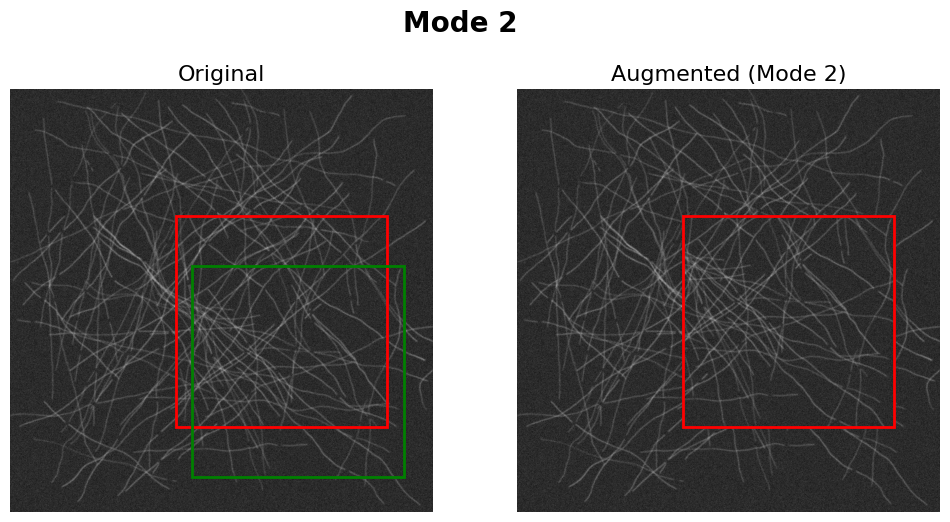

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image_data_show, cmap='gray')
axs[0].set_title('Original', fontsize=16, loc='center')
axs[0].axis('off')
rect = plt.Rectangle((ya, xa), P2Ppatch, P2Ppatch, linewidth=2, edgecolor='r', facecolor='none')
axs[0].add_patch(rect)
rect = plt.Rectangle((yb, xb), P2Ppatch, P2Ppatch, linewidth=2, edgecolor='g', facecolor='none')
axs[0].add_patch(rect)

axs[1].imshow(image_data_pre_m2, cmap='gray')
axs[1].set_title('Augmented (Mode 2)', fontsize=16, loc='center')
axs[1].axis('off')
rect = plt.Rectangle((ya, xa), P2Ppatch, P2Ppatch, linewidth=2, edgecolor='r', facecolor='none')
axs[1].add_patch(rect)

plt.suptitle("Mode 2", fontsize=20, fontweight='bold')
plt.show()

### Mode 3: Interchange patches in multiple frame but in different regions;

In [4]:
P2Pmode = 3
image_data_b = tifffile.imread(datapath_list[random.randint(1, l - 1)])
image_data_pre_m3, xa, ya, xb, yb  = random_interchange(P2Pmode, P2Ppatch, imga = image_data,imgb = image_data_b) 

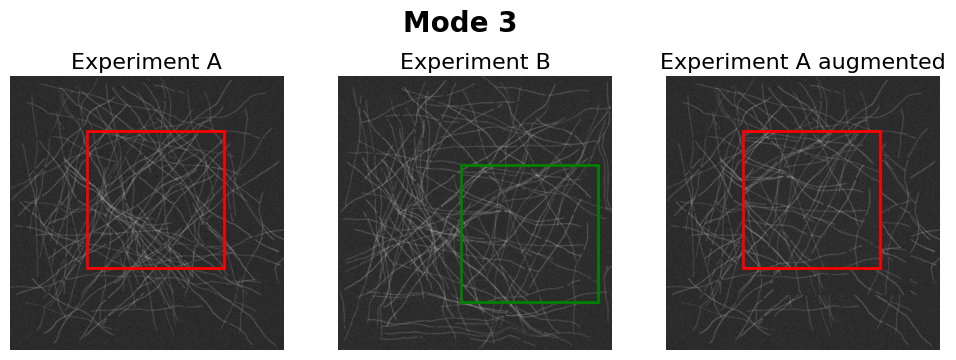

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].imshow(image_data_show, cmap='gray')
axs[0].set_title('Experiment A', fontsize=16, loc='center')
axs[0].axis('off')
rect = plt.Rectangle((ya, xa), P2Ppatch, P2Ppatch, linewidth=2, edgecolor='r', facecolor='none')
axs[0].add_patch(rect)

axs[1].imshow(image_data_b, cmap='gray')
axs[1].set_title('Experiment B', fontsize=16, loc='center')
axs[1].axis('off')
rect = plt.Rectangle((yb, xb), P2Ppatch, P2Ppatch, linewidth=2, edgecolor='g', facecolor='none')
axs[1].add_patch(rect)

axs[2].imshow(image_data_pre_m3, cmap='gray')
axs[2].set_title('Experiment A augmented', fontsize=16, loc='center')
axs[2].axis('off')
rect = plt.Rectangle((ya, xa), P2Ppatch, P2Ppatch, linewidth=2, edgecolor='r', facecolor='none')
axs[2].add_patch(rect)

plt.subplots_adjust(bottom=0.4)
plt.suptitle("Mode 3", fontsize=20, fontweight='bold')
plt.show()

## Basic augmentation

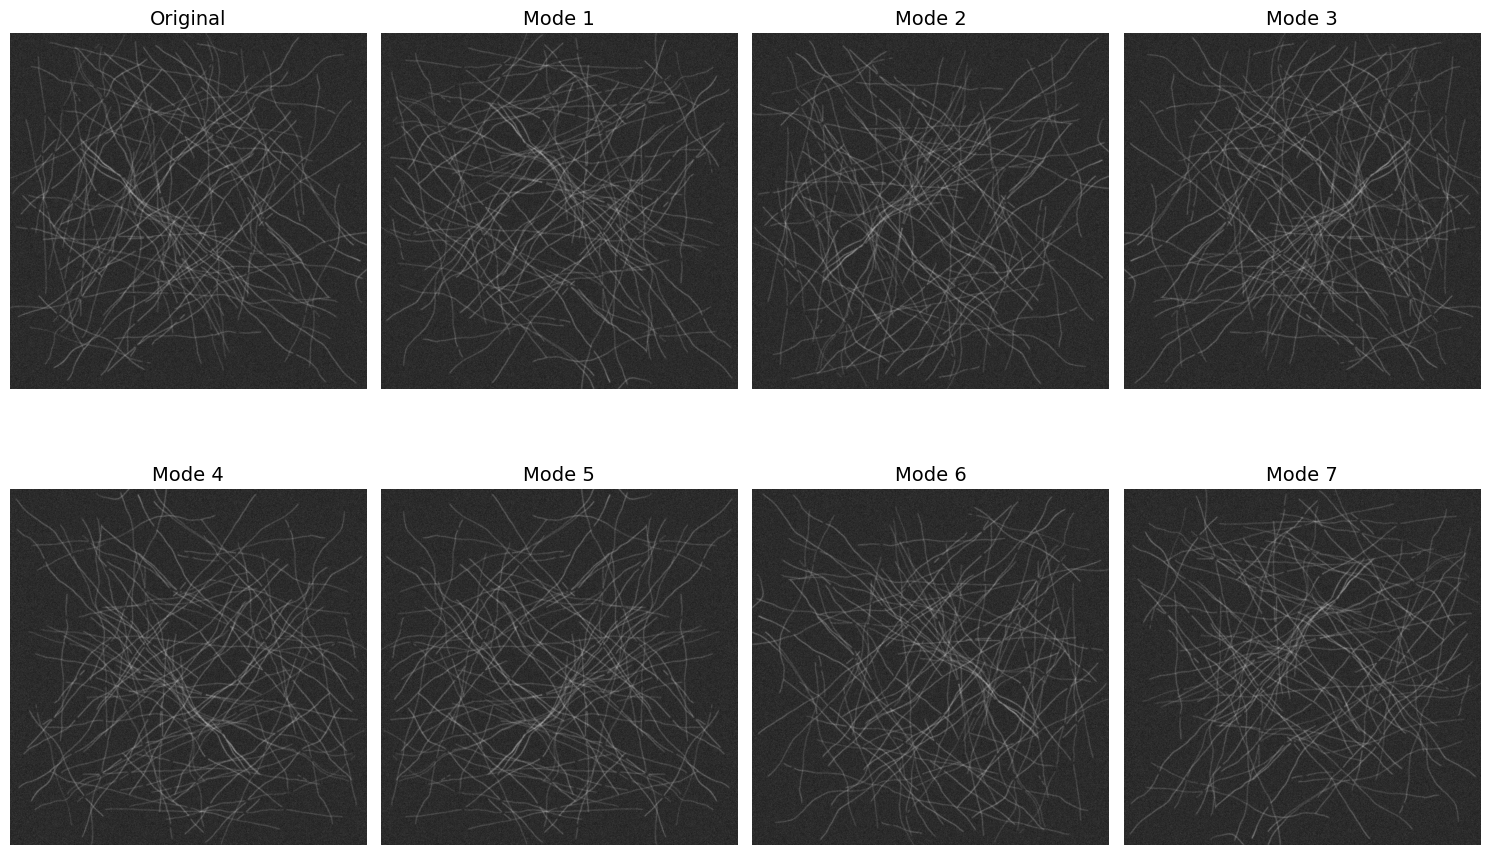

In [6]:
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

# 绘制原始图像
axs[0, 0].imshow(image_data_show, cmap='gray')
axs[0, 0].set_title('Original', fontsize=14)
axs[0, 0].axis('off')

# 循环展示七种模式的变换后的图像
for i in range(1, 8):
    r = (i) // 4
    c = (i) % 4
    augmented_img = basic_augment(image_data_show.copy(), i)
    axs[r, c].imshow(augmented_img, cmap='gray')
    axs[r, c].set_title(f'Mode {i}', fontsize=14)
    axs[r, c].axis('off')

plt.tight_layout()
plt.show()


## Patch2Patch augmentation 3D

For our 3D datasets (xyz-t), which do not have other experiments, we showcase Patch2Patch augmentation using modes 1 and 2.

### Step 1: Read raw images in the folder

In [7]:
import os
import tifffile
import random
import matplotlib.pyplot as plt
from SN2N.data_augment import random_interchange3d

# Read all raw images in the folder 
img_path = 'C:/Users/qqq/Desktop/SN2N-V0.3.0/examples/data_augmentation/3D/raw'
datapath_list = []
for (root, dirs, files) in os.walk(img_path):
    for j, Ufile in enumerate(files):
        path = os.path.join(root, Ufile)
        datapath_list.append(path)
l = len(datapath_list)

# Demonstrate the augmentation effect using the first image in the directory as an example
image_data = tifffile.imread(datapath_list[0])
image_data_show = image_data.copy()

### Mode 1: Direct interchange patches in t;

In [8]:
P2Pmode = 1
P2Ppatch = 256
image_data_b = tifffile.imread(datapath_list[random.randint(1, l - 1)])
image_data_pre_m3, xa, ya, xb, yb  = random_interchange3d(P2Pmode, P2Ppatch, imga = image_data, imgb = image_data_b) 
[t, x, y] = image_data.shape
image_data_show_m1 = image_data_show[int(t/2), :, :]
image_data_b_m1 = image_data_b[int(t/2), :, :]
image_data_pre_m1 = image_data_pre_m3[int(t/2), :, :]

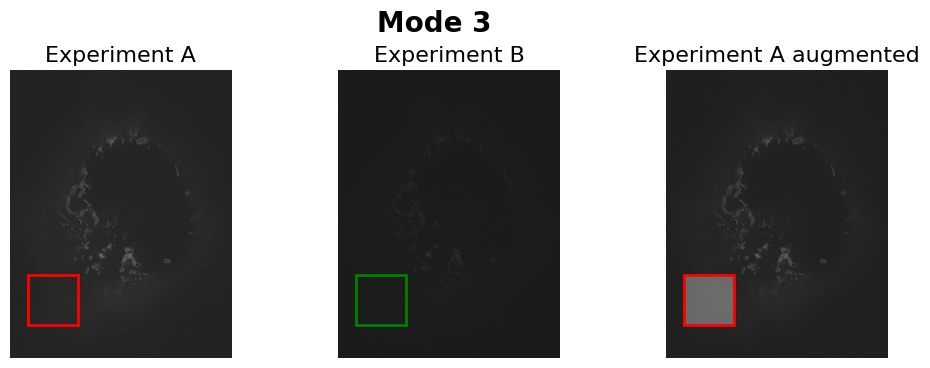

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].imshow(image_data_show_m1, cmap='gray')
axs[0].set_title('Experiment A', fontsize=16, loc='center')
axs[0].axis('off')
rect = plt.Rectangle((ya, xa), P2Ppatch, P2Ppatch, linewidth=2, edgecolor='r', facecolor='none')
axs[0].add_patch(rect)

axs[1].imshow(image_data_b_m1, cmap='gray')
axs[1].set_title('Experiment B', fontsize=16, loc='center')
axs[1].axis('off')
rect = plt.Rectangle((yb, xb), P2Ppatch, P2Ppatch, linewidth=2, edgecolor='g', facecolor='none')
axs[1].add_patch(rect)

axs[2].imshow(image_data_pre_m1, cmap='gray')
axs[2].set_title('Experiment A augmented', fontsize=16, loc='center')
axs[2].axis('off')
rect = plt.Rectangle((ya, xa), P2Ppatch, P2Ppatch, linewidth=2, edgecolor='r', facecolor='none')
axs[2].add_patch(rect)
plt.subplots_adjust(bottom=0.4)
plt.suptitle("Mode 3", fontsize=20, fontweight='bold')
plt.show()

### Mode 2: Interchange patches in single frame;

In [10]:
P2Pmode = 2
P2Ppatch = 256
image_data_b = []
image_data_pre_m2, xa, ya, xb, yb = random_interchange3d(P2Pmode, P2Ppatch, imga = image_data_show, imgb = image_data_b)

[t, x, y] = image_data.shape
image_data_show_m2 = image_data_show[int(t/2), :, :]
image_data_pre_m2 = image_data_pre_m2[int(t/2), :, :]

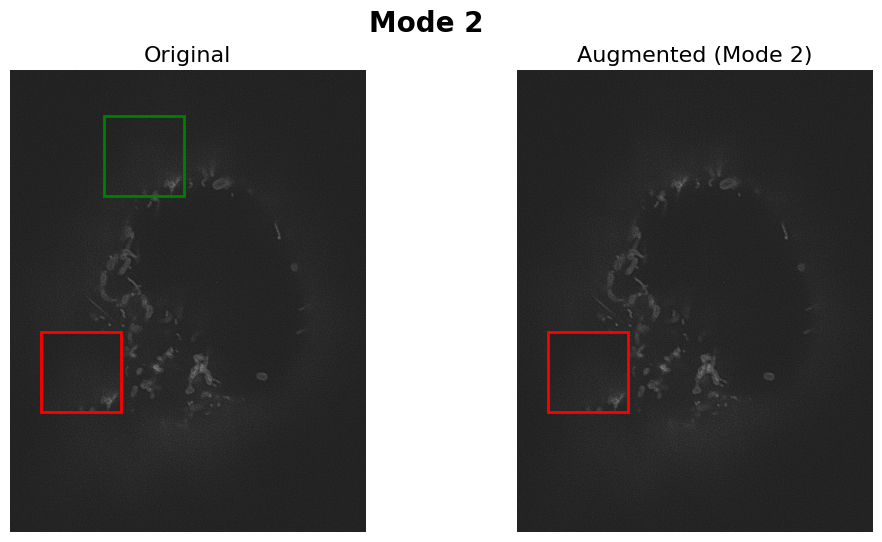

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image_data_show_m2, cmap='gray')
axs[0].set_title('Original', fontsize=16, loc='center')
axs[0].axis('off')
rect = plt.Rectangle((ya, xa), P2Ppatch, P2Ppatch, linewidth=2, edgecolor='r', facecolor='none')
axs[0].add_patch(rect)
rect = plt.Rectangle((yb, xb), P2Ppatch, P2Ppatch, linewidth=2, edgecolor='g', facecolor='none')
axs[0].add_patch(rect)

axs[1].imshow(image_data_pre_m2, cmap='gray')
axs[1].set_title('Augmented (Mode 2)', fontsize=16, loc='center')
axs[1].axis('off')
rect = plt.Rectangle((ya, xa), P2Ppatch, P2Ppatch, linewidth=2, edgecolor='r', facecolor='none')
axs[1].add_patch(rect)

plt.suptitle("Mode 2", fontsize=20, fontweight='bold')
plt.show()